# Customer Churn Prediction

This notebook contains the full pipeline to predict customer churn using Telco dataset.

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score

In [2]:
df = pd.read_csv("../data/WA_Fn-UseC_-Telco-Customer-Churn.csv")
df.head()


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
df.info()
df.describe()
df['Churn'].value_counts()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Churn
No     5174
Yes    1869
Name: count, dtype: int64

In [4]:
df.isnull().sum()
df.dropna(inplace=True)


In [5]:
df = pd.get_dummies(df, drop_first=True)


In [6]:
X = df.drop("Churn_Yes", axis=1)
y = df["Churn_Yes"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Accuracy: 0.8246983676366217
Confusion Matrix:
 [[940  96]
 [151 222]]


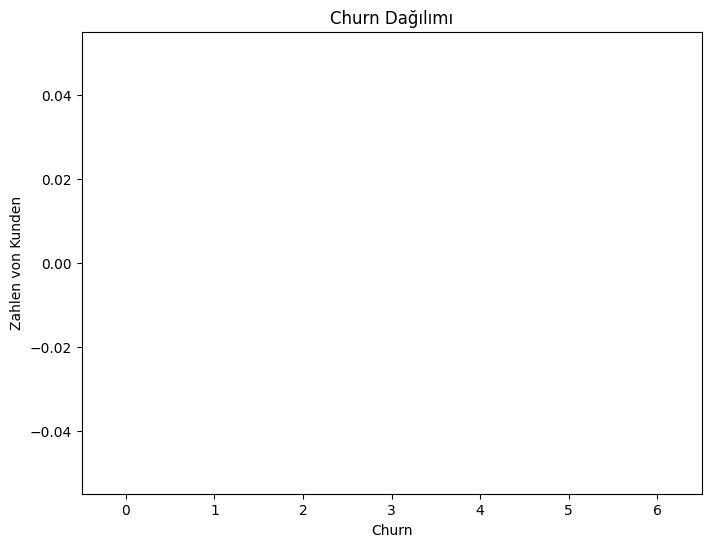

In [8]:
# Sayısal etiketi kategorik hale çevir (0 → No, 1 → Yes)
df['Churn_Label'] = df['Churn_Yes'].map({0: 'No', 1: 'Yes'})

# Grafiği çiz
plt.figure(figsize=(8,6))
sns.countplot(x='Churn_Label', data=df)
plt.title('Churn Dağılımı')
plt.xlabel('Churn')
plt.ylabel('Zahlen von Kunden')
plt.show()


In [9]:
print(df['tenure'].describe())
print(df['tenure'].unique())


count    7043.000000
mean       32.371149
std        24.559481
min         0.000000
25%         9.000000
50%        29.000000
75%        55.000000
max        72.000000
Name: tenure, dtype: float64
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]


In [10]:
print("Null value Zahlen:", df['tenure'].isnull().sum())
print(df['Churn_Label'].value_counts(dropna=False))



Null value Zahlen: 0
Churn_Label
NaN    7043
Name: count, dtype: int64


C:\Users\mert\AppData\Local\Temp\ipykernel_12104\1416530160.py:7: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


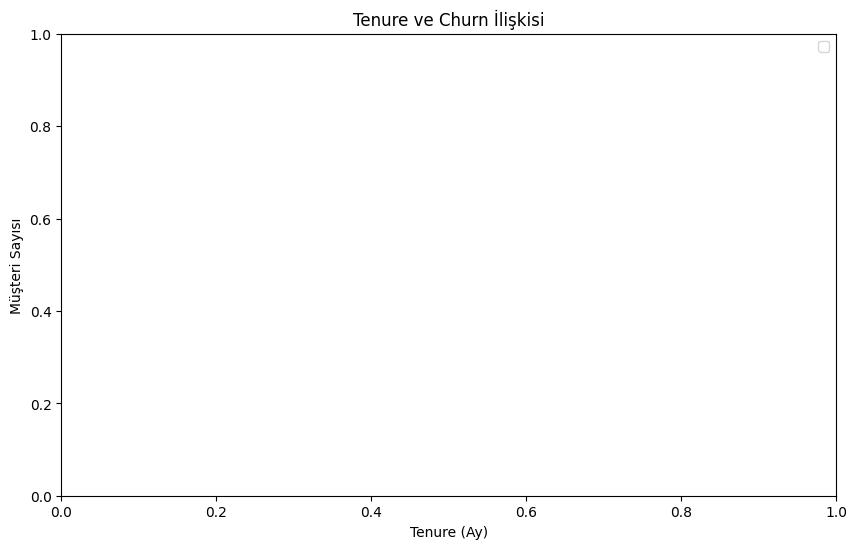

In [11]:
plt.figure(figsize=(10,6))
sns.histplot(df[df['Churn_Label'] == 'Yes']['tenure'], color='red', label='Churned', bins=30, kde=False)
sns.histplot(df[df['Churn_Label'] == 'No']['tenure'], color='green', label='Not Churned', bins=30, kde=False)
plt.title('Tenure ve Churn İlişkisi')
plt.xlabel('Tenure (Ay)')
plt.ylabel('Müşteri Sayısı')
plt.legend()
plt.show()




C:\Users\mert\AppData\Local\Temp\ipykernel_12104\2240044601.py:14: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


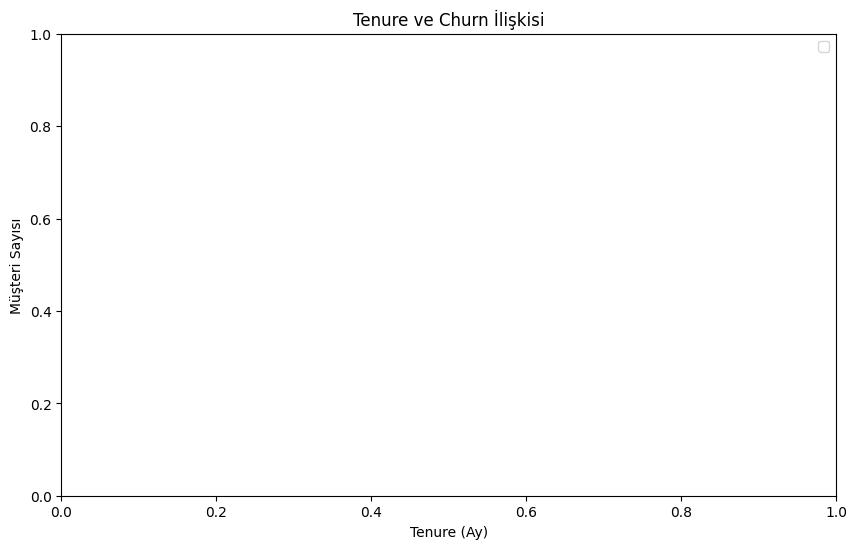

In [12]:
plt.figure(figsize=(10,6))

# 'Churn_Label' Yes olanları kırmızı çiz
sns.histplot(df[df['Churn_Label'] == 'Yes']['tenure'], 
             bins=30, color='red', label='Churned', kde=False)

# 'Churn_Label' No olanları yeşil çiz
sns.histplot(df[df['Churn_Label'] == 'No']['tenure'], 
             bins=30, color='green', label='Not Churned', kde=False)

plt.title('Tenure ve Churn İlişkisi')
plt.xlabel('Tenure (Ay)')
plt.ylabel('Müşteri Sayısı')
plt.legend()
plt.show()




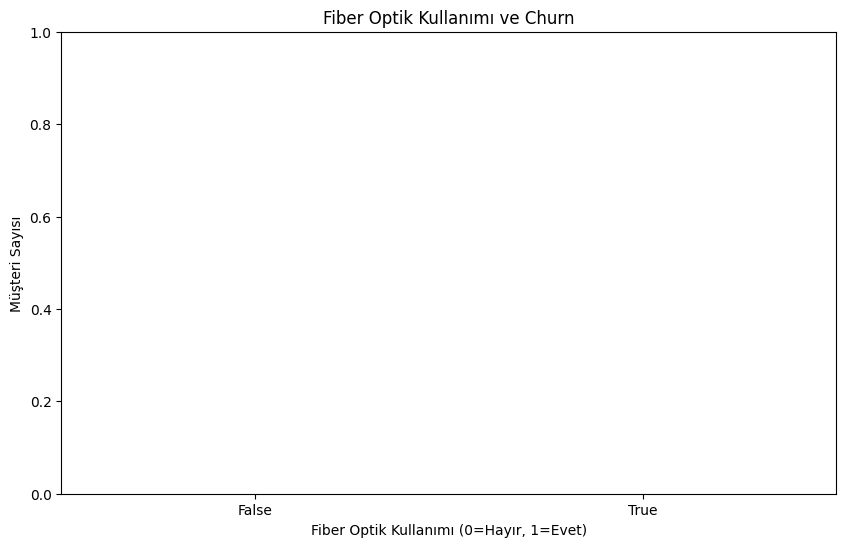

In [13]:
# 'InternetService_Fiber optic' varsa bu grafik çalışır
plt.figure(figsize=(10,6))
sns.countplot(x='InternetService_Fiber optic', hue='Churn_Label', data=df)
plt.title('Fiber Optik Kullanımı ve Churn')
plt.xlabel('Fiber Optik Kullanımı (0=Hayır, 1=Evet)')
plt.ylabel('Müşteri Sayısı')
plt.show()


In [14]:
df.columns[df.columns.str.contains("InternetService")]


Index(['InternetService_Fiber optic', 'InternetService_No'], dtype='object')

In [15]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, ConfusionMatrixDisplay

# Precision, Recall, F1-Score
print("🔍 Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Churn = No", "Churn = Yes"]))

# ROC AUC
y_pred_proba = model.predict_proba(X_test)[:,1]
roc_auc = roc_auc_score(y_test, y_pred_proba)
print(f"ROC AUC: {roc_auc:.3f}")


🔍 Classification Report:
              precision    recall  f1-score   support

  Churn = No       0.86      0.91      0.88      1036
 Churn = Yes       0.70      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

ROC AUC: 0.861


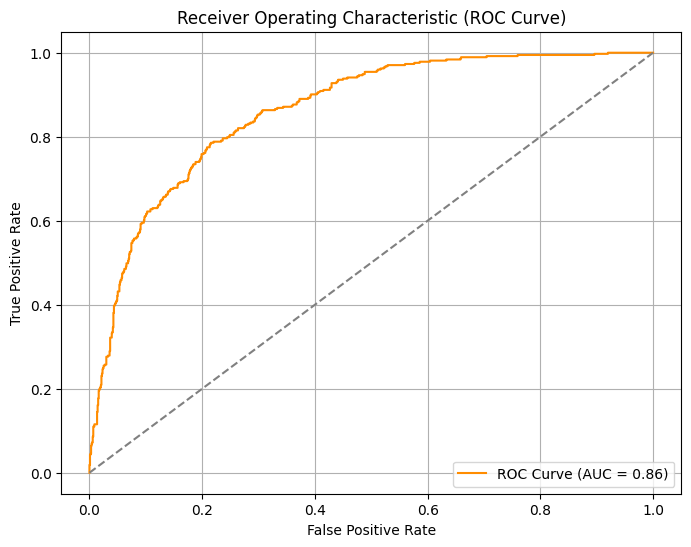

In [16]:
# ROC Eğrisi
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})', color='darkorange')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC Curve)')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()


AUC (Area Under Curve): 0.8612


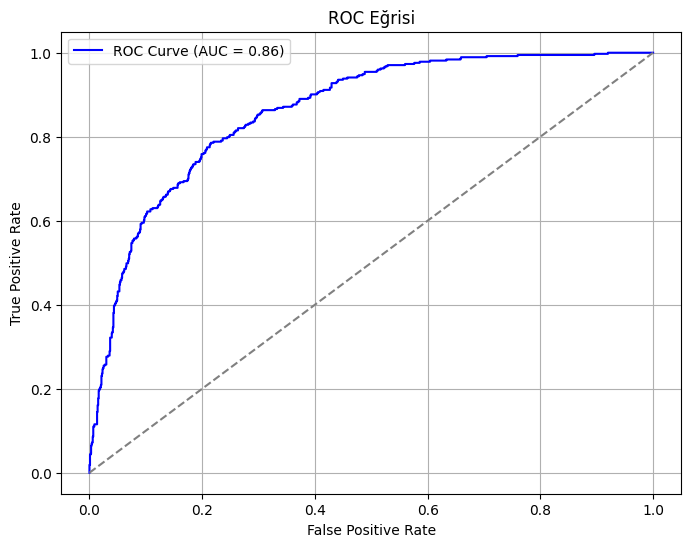

In [17]:
from sklearn.metrics import roc_curve, roc_auc_score

# Modelin olasılık tahminleri (sadece 'churn=1' olasılığı)
y_probs = model.predict_proba(X_test)[:, 1]

# ROC eğrisi için gerekli değerler
fpr, tpr, thresholds = roc_curve(y_test, y_probs)

# AUC skoru
auc_score = roc_auc_score(y_test, y_probs)
print(f"AUC (Area Under Curve): {auc_score:.4f}")

# ROC eğrisi çizimi
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc_score:.2f})', color='blue')
plt.plot([0,1], [0,1], linestyle='--', color='gray')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Eğrisi")
plt.legend()
plt.grid(True)
plt.show()


In [18]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Precision: Pozitif tahminlerin doğruluğu
precision = precision_score(y_test, y_pred)

# Recall: Gerçek pozitiflerin kaçını yakaladık
recall = recall_score(y_test, y_pred)

# F1: Precision ve Recall’un harmonik ortalaması
f1 = f1_score(y_test, y_pred)

print(f"Precision: {precision:.4f}")
print(f"Recall   : {recall:.4f}")
print(f"F1 Score : {f1:.4f}")


Precision: 0.6981
Recall   : 0.5952
F1 Score : 0.6425


In [19]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred, target_names=["No Churn", "Churn"]))


              precision    recall  f1-score   support

    No Churn       0.86      0.91      0.88      1036
       Churn       0.70      0.60      0.64       373

    accuracy                           0.82      1409
   macro avg       0.78      0.75      0.76      1409
weighted avg       0.82      0.82      0.82      1409

